In [209]:
import torch
import matplotlib.pyplot as plt 
%matplotlib inline 
import torch.nn.functional as F 
import random 

In [210]:
words = names = open("names.txt").read().splitlines()
chars = sorted(list(set(''.join(names))))
stoi = { ch: i+1 for i, ch in enumerate(chars)}
stoi["."] = 0
itos = { v:k for k, v in stoi.items()}

In [216]:
WINDOW_SIZE = 3

def create_dataset(words):
    X, Y = [], []
    for w in words[:]:
        window = [0] * WINDOW_SIZE
        # print(w)
        for ch in w + ".": 
            ix = stoi[ch]
            X.append(window)
            Y.append(ix)
            window = window[1:] + [ix]
    return torch.tensor(X), torch.tensor(Y)
   
# Create dataset 
random.shuffle(words)
i, j = int(0.8*len(words)), int(0.9*len(words))    

Xtr, Ytr = create_dataset(words[:i])
Xval, Yval = create_dataset(words[i:j])
Xtest, Ytest = create_dataset(words[j:])

In [221]:
# Setup Architecture of NN 
LEARNING_RATE = 0.1

EMB_SIZE = 2
g = torch.Generator().manual_seed(2147483647)
Emb = torch.randn((len(stoi), EMB_SIZE))
W1 = torch.randn((EMB_SIZE*WINDOW_SIZE, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn( (100, len(stoi)), generator=g)
b2 = torch.randn(len(stoi), generator=g)
parameters = [Emb, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True 


In [224]:

def train(X, Y, init_network=False):
    if init_network:
        init_network()
    losses = []
    for i in range(20_000):
        idxs = torch.randint(0, X.shape[0], (32,))
        emb = Emb[X[idxs]].view(-1, EMB_SIZE*WINDOW_SIZE)
        a1 = torch.tanh(emb @ W1 + b1)
        logits = a1 @ W2 + b2 
        
        loss = F.cross_entropy(logits, Y[idxs])
        losses.append(loss.item())
        
        # Backward Pass
        for p in parameters:
            p.grad = None 
        loss.backward()
        lr = LEARNING_RATE if i < 100_000 else (LEARNING_RATE / 10)
        for p in parameters:
            p.data += -lr * p.grad
    return losses
Losses = train(Xtr, Ytr)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

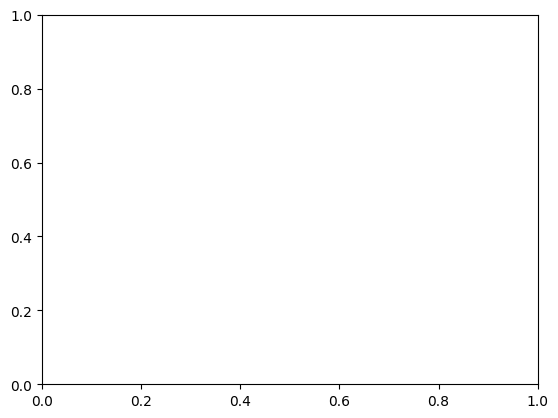

In [225]:
plt.plot(Losses)

In [211]:
h1 = torch.tanh(Emb[X].view(-1, EMB_SIZE*WINDOW_SIZE ) @ W1 + b1)
print("LOSS: ", F.cross_entropy((h1 @ W2 + b2), Y).item())

LOSS:  2.2531673908233643


In [205]:
# g = torch.Generator().manual_seed(2147483647)
for i in range(100):
    xidxs = [0]*WINDOW_SIZE
    chars = []
    while True:
        I = Emb[torch.tensor(xidxs)].view(-1, WINDOW_SIZE*EMB_SIZE)
        # print(X.shape)
        a1 = torch.tanh(I @ W1 + b1)
        logits = (a1 @ W2 + b2)
        probs = F.softmax(logits, dim=1)
        yidx = torch.multinomial(probs, num_samples=1, replacement=False, generator=g).item()
        xidxs = (xidxs + [yidx])[-3:]
        chars.append(itos[yidx])
        if yidx == 0:
            break 
    print("".join(chars))

amalekha.
doru.
nayne.
catya.
hen.
dhia.
hem.
raythanlyanns.
gamydouah.
mos.
tareni.
ama.
luanahay.
emdelio.
gaci.
mri.
mrarallona.
damriadmyn.
navyng.
bray.
erre.
jhazek.
keyc.
maylynahin.
nefnlen.
rekenne.
larianen.
eyna.
onimsesorar.
sizri.
naxeidyn.
kentor.
moli.
bailahza.
ductieanah.
zar.
slendo.
leezofkolhineria.
axuina.
cheyan.
fhvyn.
abrielinana.
rer.
ezdionna.
amela.
rirendra.
ara.
gar.
aphi.
alarpa.
bris.
ayli.
alirens.
edmaedan.
ryle.
ryliin.
machloni.
kie.
cati.
jar.
elrone.
zawanna.
juskon.
esmany.
marlu.
onjahvenia.
iyv.
anm.
chahay.
harinpa.
altanlina.
drenbinar.
jebhoh.
jyi.
rlkeyre.
hashsoh.
friayay.
jhi.
amrin.
rrye.
lin.
eyah.
salyanar.
iml.
darylede.
lacha.
khta.
mai.
bachee.
crlyyn.
racsinarigourhaenanny.
abrold.
jeojenwexdy.
lomei.
maghimeanyn.
benelobpiynehak.
lyla.
zalytani.
maliarnasrekh.
nes.
